## *Import Libraries*

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from histogram import histogram
import warnings

In [2]:
warnings.filterwarnings('ignore')

### *Load Dataset*

In [3]:
df = pd.read_csv('C:/Users/PC/Desktop/Car-Sales/data/cars_sales.csv')

# **EDA**

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,engineSize,manufacturer
0,GT86,2016,16000,Manual,24089,Petrol,2.0,Toyota
1,GT86,2017,15995,Manual,18615,Petrol,2.0,Toyota
2,GT86,2015,13998,Manual,27469,Petrol,2.0,Toyota
3,GT86,2017,18998,Manual,14736,Petrol,2.0,Toyota
4,GT86,2017,17498,Manual,36284,Petrol,2.0,Toyota


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   engineSize    108540 non-null  float64
 7   manufacturer  108540 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.6+ MB


In [6]:
{col: list(df[col].unique()) for col in df.select_dtypes("object")}

{'model': [' GT86',
  ' Corolla',
  ' RAV4',
  ' Yaris',
  ' Auris',
  ' Aygo',
  ' C-HR',
  ' Prius',
  ' Avensis',
  ' Verso',
  ' Hilux',
  ' PROACE VERSO',
  ' Land Cruiser',
  ' Supra',
  ' Camry',
  ' Verso-S',
  ' IQ',
  ' Urban Cruiser',
  ' Fiesta',
  ' Focus',
  ' Puma',
  ' Kuga',
  ' EcoSport',
  ' C-MAX',
  ' Mondeo',
  ' Ka+',
  ' Tourneo Custom',
  ' S-MAX',
  ' B-MAX',
  ' Edge',
  ' Tourneo Connect',
  ' Grand C-MAX',
  ' KA',
  ' Galaxy',
  ' Mustang',
  ' Grand Tourneo Connect',
  ' Fusion',
  ' Ranger',
  ' Streetka',
  ' Escort',
  ' Transit Tourneo',
  ' I20',
  ' Tucson',
  ' I10',
  ' IX35',
  ' I30',
  ' I40',
  ' Ioniq',
  ' Kona',
  ' Veloster',
  ' I800',
  ' IX20',
  ' Santa Fe',
  ' Accent',
  ' Terracan',
  ' Getz',
  ' Amica',
  ' T-Roc',
  ' Golf',
  ' Passat',
  ' T-Cross',
  ' Polo',
  ' Tiguan',
  ' Sharan',
  ' Up',
  ' Scirocco',
  ' Beetle',
  ' Caddy Maxi Life',
  ' Caravelle',
  ' Touareg',
  ' Arteon',
  ' Touran',
  ' Golf SV',
  ' Amarok',
  

In [7]:
sns.set_style('whitegrid')

## *Price*

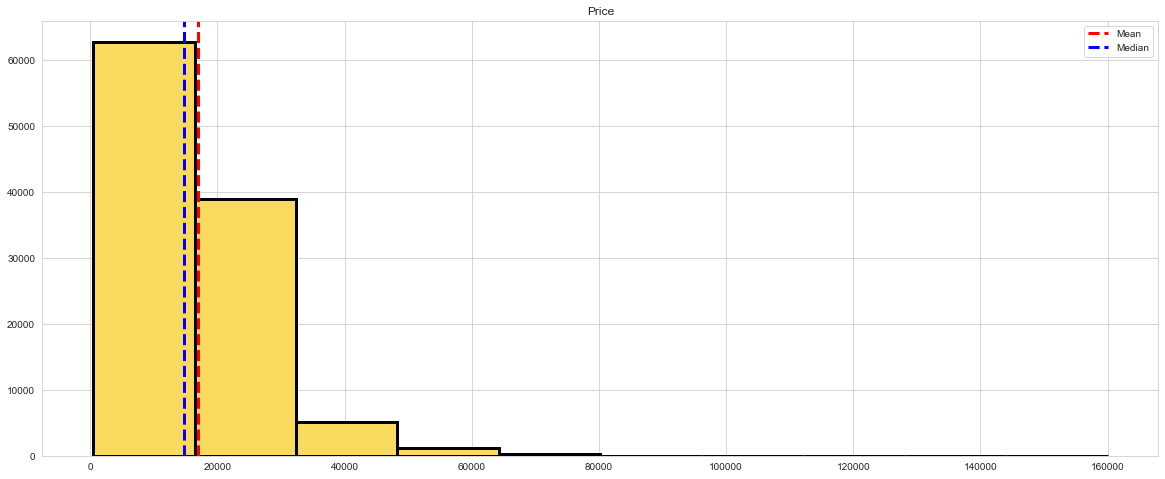

In [16]:
_ = histogram(df.price,"Price")

Atypical values are presented in the histogram, this is because we are dealing with high-priced and prestigious car manufacturers, such as Mercedes-Benz or BMW.

In [47]:
def PiePlot(feature):
    serie = df[feature].value_counts()
    fig = plt.subplots(1,1,figsize = (22,8))
    serie.plot(kind = 'pie',colors = ['#fdfd96','#fdcae1',
                                      '#84b6f4','#b0c2f2',
                                      '#ff6961','#77dd77'],
               autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))
    
    plt.ylabel(None)

### *Percentage of Vehicle Manufacturers*

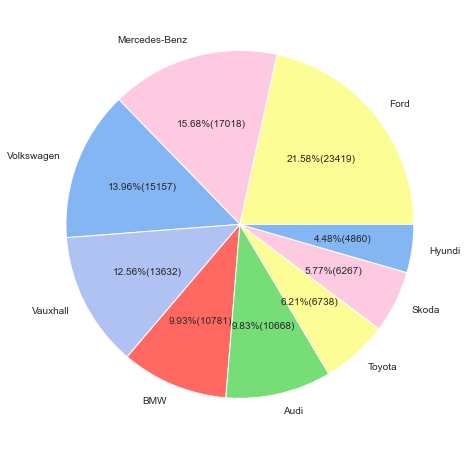

In [48]:
_ = PiePlot('manufacturer')

### *Which Vehicle Manufacturer has a Higher Average Price?*

In [17]:
serie_mean_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending = True)

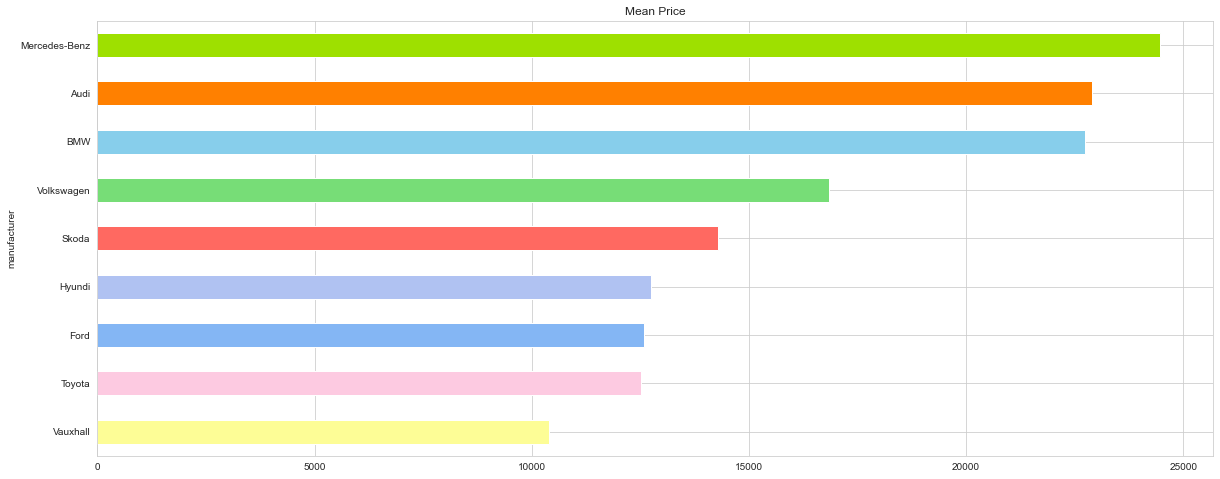

In [18]:
fig = plt.subplots(1,1,figsize = (20,8))
_= serie_mean_price.plot(kind = 'barh',title = 'Mean Price',
                         color = ['#fdfd96','#fdcae1',
                                  '#84b6f4','#b0c2f2',
                                  '#ff6961','#77dd77','#87CEEB','#ff8000','#9ee000'])

Mercedes Benz for this dataset is the vehicle manufacturer with a higher average price. It is not surprising since it is a manufacturer of high prestige vehicles just like BMW and Audi.

In [19]:
ford = df.query("manufacturer == 'Ford'")
toyota = df.query("manufacturer == 'Toyota'")
hyundi = df.query("manufacturer == 'Hyundi'")

In [20]:
audi = df.query("manufacturer == 'Audi'")
bmw = df.query("manufacturer == 'BMW'")
mercedes = df.query("manufacturer == 'Mercedes-Benz'")

In [21]:
vw = df.query("manufacturer == 'Volkswagen'")
vauxhall = df.query("manufacturer == 'Vauxhall'")
skoda = df.query("manufacturer == 'Skoda'")

Create several subsets in order to create a graph, where the average price is presented according to the vehicle model.

In [46]:
def BarplotModel(subset):
    serie = subset.groupby('model')['price'].mean().sort_values(ascending = True)
    fig = plt.subplots(1,1,figsize = (20,8))
    serie.plot(kind = 'barh',color = ['#fdfd96','#fdcae1','#84b6f4','#b0c2f2','#ff6961','#77dd77'])

Create a function that allows me to make a bar graph, to calculate the average price according to the model.

### *Average of Each Vehicle According to the Manufacturer*

#### *Ford*

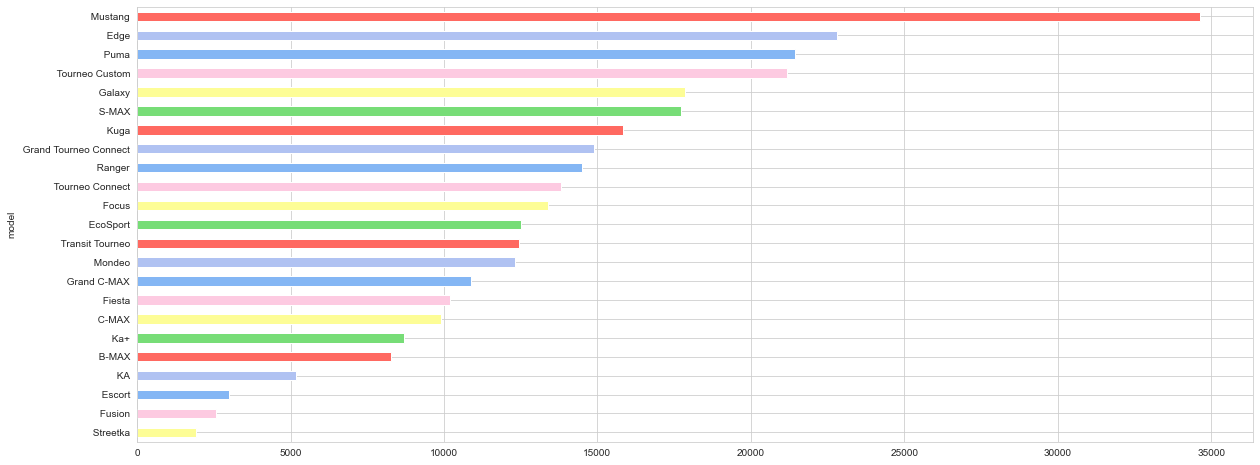

In [23]:
_ = BarplotModel(ford)

#### *Toyota*

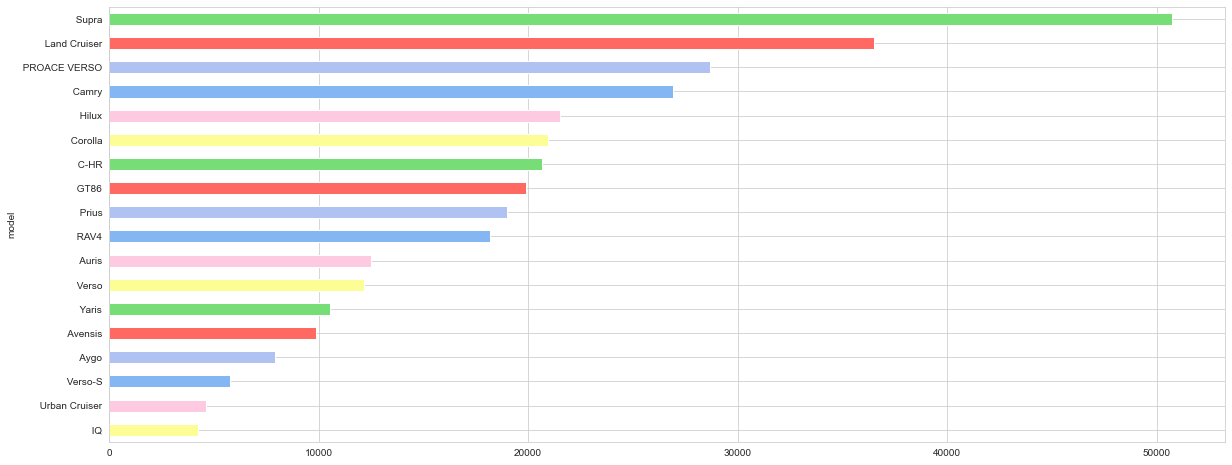

In [24]:
_ = BarplotModel(toyota)

#### *Hyundi*

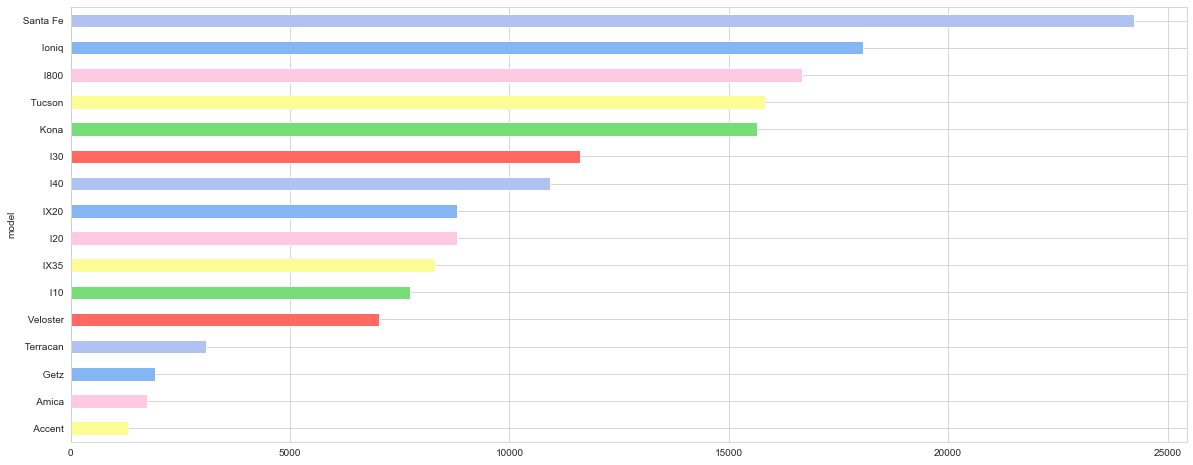

In [25]:
_ = BarplotModel(hyundi)

#### *Audi*

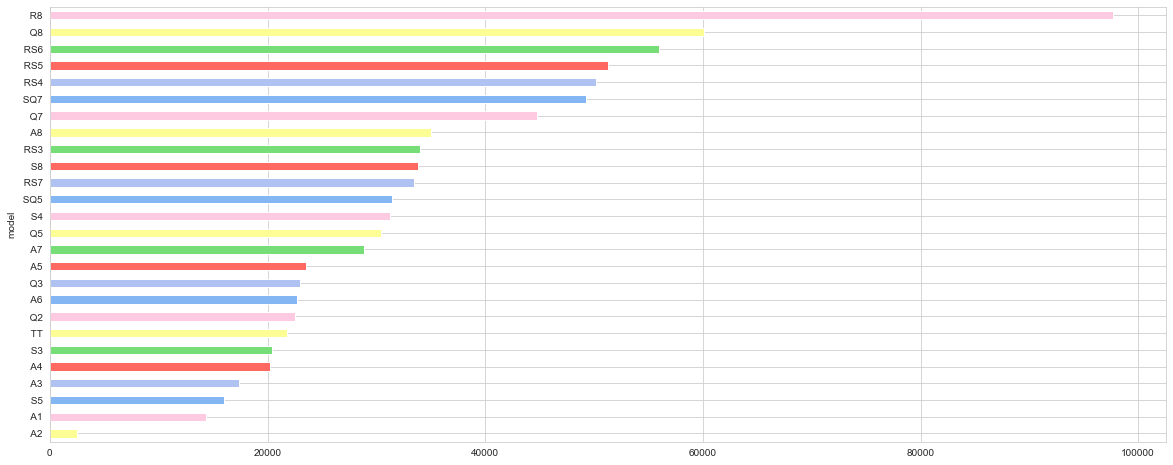

In [26]:
_ = BarplotModel(audi)

#### *BMW*

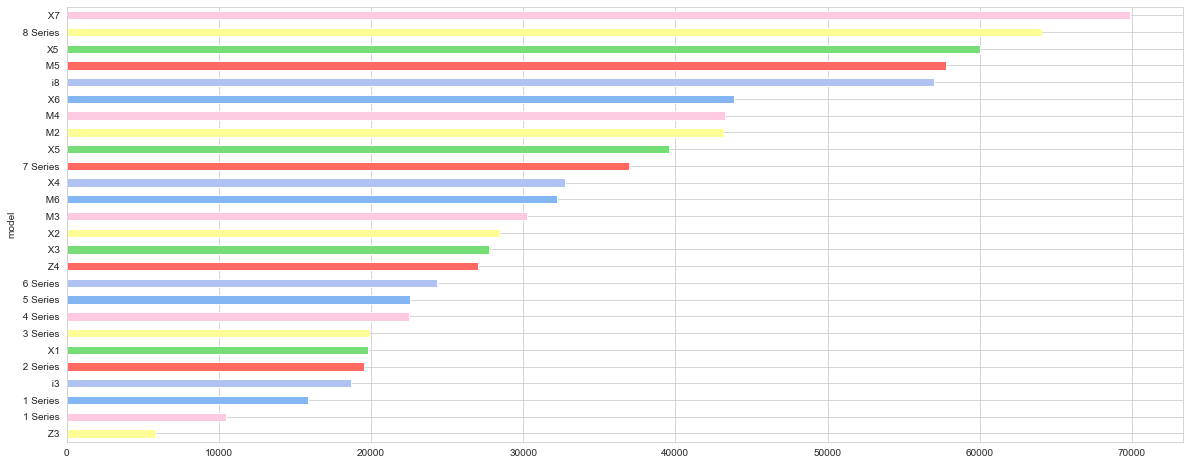

In [27]:
_ = BarplotModel(bmw)

#### *Mercedes Venz*

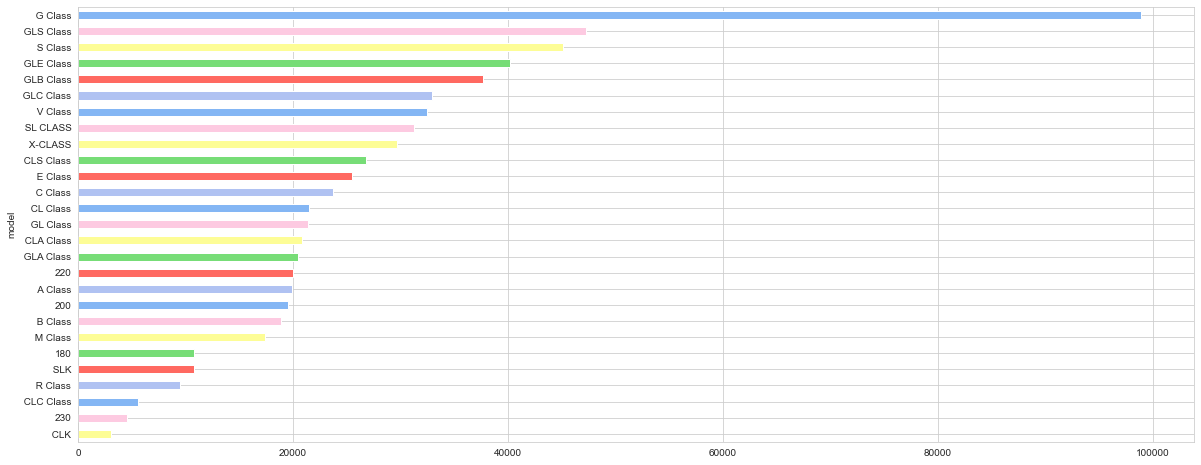

In [28]:
_ = BarplotModel(mercedes)

### *Skoda*

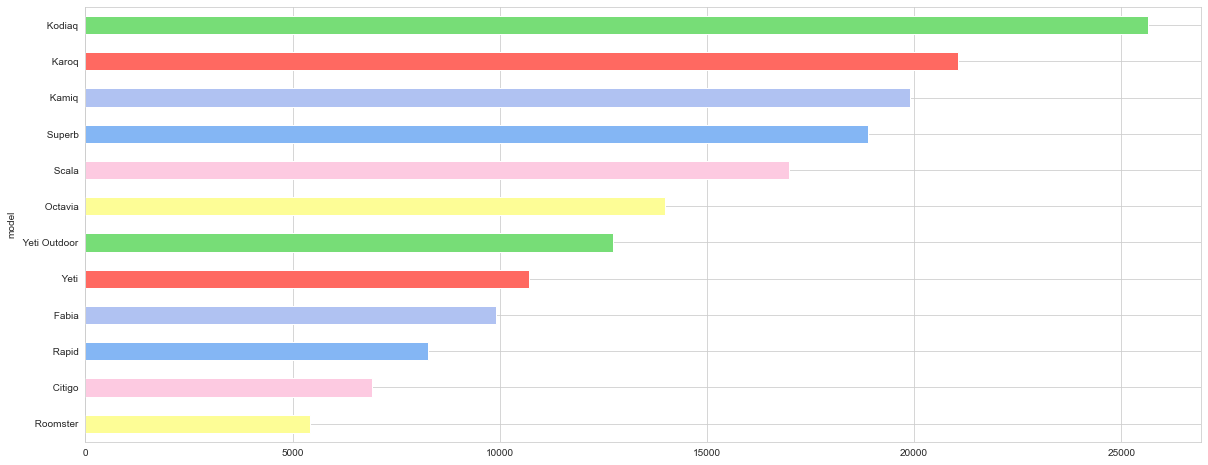

In [29]:
_ = BarplotModel(skoda)

### *Vauxhall*

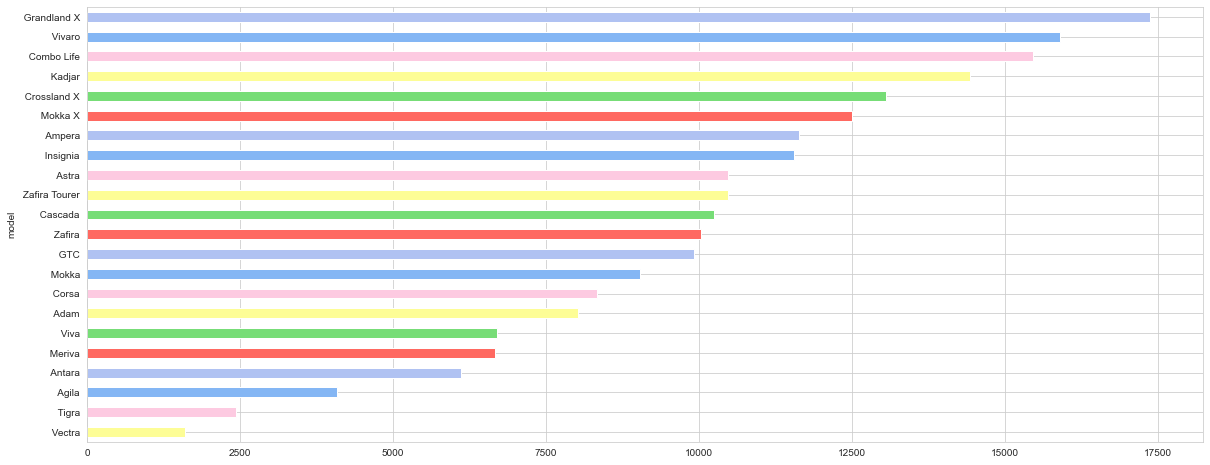

In [30]:
_ = BarplotModel(vauxhall)

### *Volkswagen*

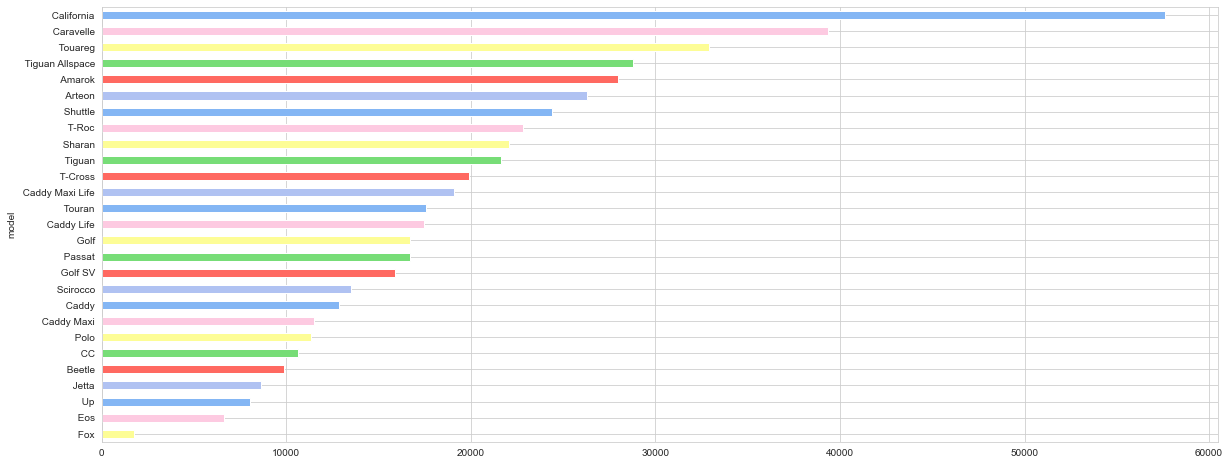

In [31]:
_ = BarplotModel(vw)

### *What Type of Transmission has the Highest Average Price?*

In [33]:
trasmision_serie = df.groupby("transmission")['price'].mean().sort_values(ascending = True)

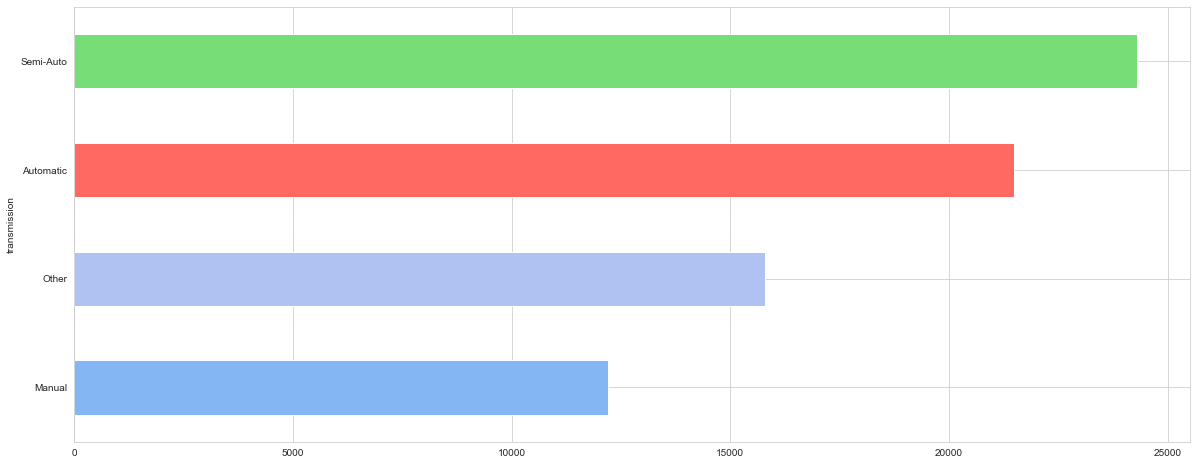

In [36]:
fig = plt.subplots(1,1,figsize = (20,8))
_ = trasmision_serie.plot(kind = 'barh',
                           color = ['#84b6f4',
                                     '#b0c2f2','#ff6961','#77dd77'])

The semi-automatic transmission has a higher price than even the automatic gearbox, the prices of a manual transmission the price is cheaper, since it is more complex at the level of engineering and ease of use.


### *Percentage of Transmission in Vehicles*

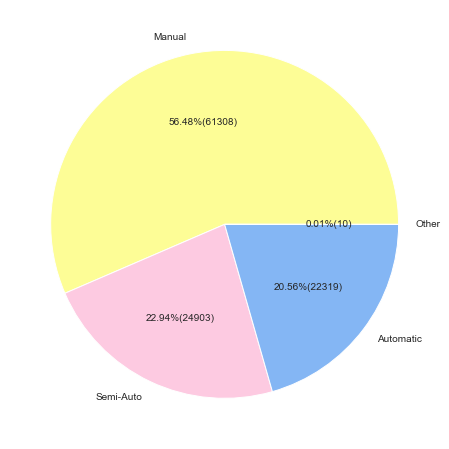

In [50]:
_ = PiePlot('transmission')

## *Mileage*

In [39]:
df.mileage.agg(['min','max'])

min         1
max    323000
Name: mileage, dtype: int64

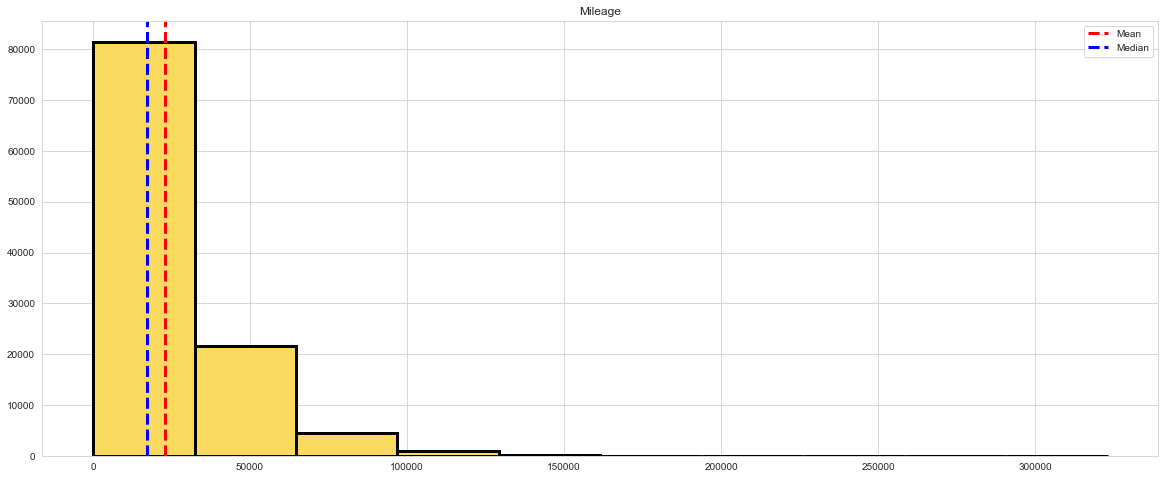

In [40]:
_ = histogram(df.mileage,'Mileage')

There are very few vehicles that have an insanely low mileage, in turn gay vehicles that have an insane amount of miles traveled.

## *Correlation Plot*

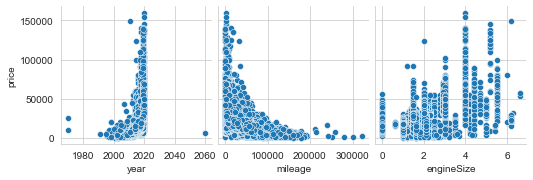

In [42]:
_ = sns.pairplot(data = df,x_vars = ['year','mileage','engineSize'],y_vars = ['price'])

* **Year**: It has a high relationship with the price, since generally a newer model will be more expensive, a clear outlier is presented for the Year variable. Since there are no vehicles that have a manufacturing date of the year 2060, perhaps it is a failure to collect the data.




* **Mileage**: Vehicles with more miles decreases the price of the vehicle. Since more wear will be generated.




* **Engine Size**: Generally luxury vehicles have a more powerful engine than low-end vehicles.

### *Correlation Matrix*

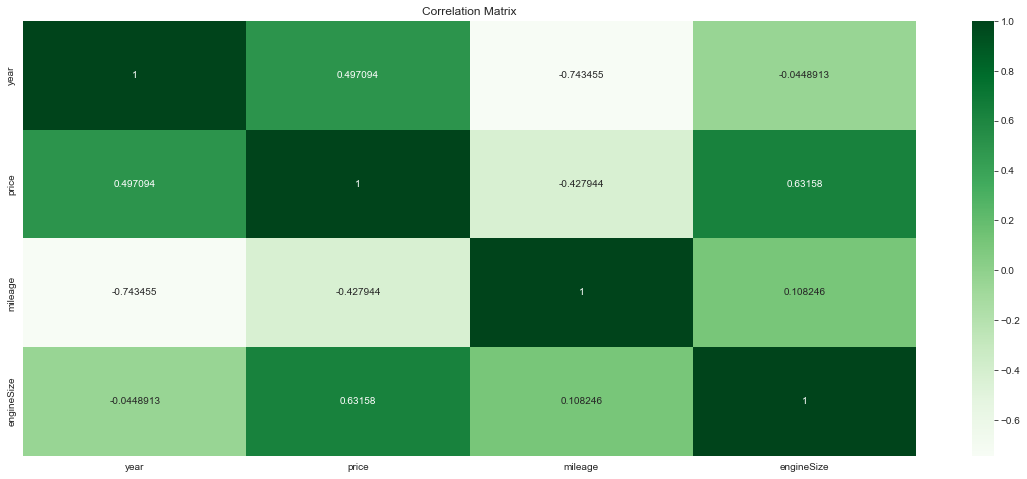

In [54]:
fig,ax= plt.subplots(1,1,figsize = (20,8))

_ = ax.set_title("Correlation Matrix")
_ = sns.heatmap(df.corr(),annot=True,fmt="g",cmap="Greens")

The correlation is measured from 0 to 1 if it is positive, there does not appear to be a strong relationship between the variable of interest. It is still too early to start ruling out variables, since these variables can complement the predictions.

## **Conclusion**

The dataset has several outliers for example with the following variables:

* Year: There is a value that has a manufacturing date that is equal to the year 2060. Something that is illogical, it was probably a registry error.





* Mileage: There are vehicles that have a mile traveled, something that is very rare to happen. These observations probably made some modifications to the odometer so that this number of miles traveled would appear. Normally, pre-owned vehicles have at least 3,000 miles of travel with the vehicle as a minimum.






* Those categories that contain a value that is equal to "Other" will have to be eliminated, since they do not add any value to the resolution of the problem.All those categories that present less than 10 times I will choose to eliminate them, since it does not make sense for the model to only learn very specific patterns, it can cause the algorithm to overfit.


